<a href="https://colab.research.google.com/github/wiiloebis/bangkit_machine_learning_assigment/blob/master/cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'2.2.0-rc2'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers
import time
import os, sys
import pandas as pd
from IPython import display
os.listdir(path='.')

# Define function to get file path in a directory

In [0]:
def get_file_path_in_dir(dir_name):
    ''' Get the full path name of files/folders in
    directory specified by path to directory in
    argument "dir_name" and return it as a list

    dir_name is a Path from the directory of your current working script to the folder that you want to
    check all of the subfolder/file
    example:
    pwd
    /usr/Documents
    ls .
    Music
    document.txt

    get_file_path_in_dir('usr/Documents')
    returns
    [/usr/Documents/Music,
    /usr/Documents/document.txt]
    '''
    target_dir = os.listdir(dir_name)
    dir_list = []
    for entry in target_dir:
        full_path = os.path.join(dir_name, entry)
        dir_list.append(full_path)
    
    return dir_list

# Get the full path of each subdirectory in a directory specify by the variable train_dir_name
train_dir_name contain path from current working directory(relative path) to the directory containing

In [0]:
# get every path to subfolder/file in train_dir_name folder
train_dir_name = 'plant_disease\\plan_disease_aug\\train\\'
train_data_dir = get_file_path_in_dir(train_dir_name)

In [0]:
def get_sub_dir_names(path_to_dir):
    '''Get the name of all file/folder in a directory specified
    by the path "path_to_dir" and return it as list
    example:
    pwd
    /usr/Documents
    ls .
    Music
    documents.txt

    get_sub_dir_names('usr/Documents')
    returns
    ['Music',
    'documents.txt']

    '''
    subdir_path_list = get_file_path_in_dir(path_to_dir)
    subdir_name_list = []
    for subdir in subdir_path_list:
        subdir_name_list.append(subdir.split("\\")[-1])
    return subdir_name_list

In [0]:
tomato_class_list = get_sub_dir_names(train_dir_name)
tomato_class_list

In [0]:
import PIL
from PIL import Image, ImageOps

In [0]:
def image_to_ndarray(path_to_image):
    """read image from the file path name and
    convert the image to np array with dimension of 200x200x3 pixel
    example:
    image_to_ndarray("usr/Documents/fish.jpg")
    returns
    np.array
    where np.array.shape is (100,100,3)
    """
    image = Image.open(path_to_image)
    # Resize image to 100x100 pixel
    image_resize = ImageOps.fit(image, (100, 100), Image.ANTIALIAS)
    data = np.asarray(image_resize)
    return data

# Read Train image dataset to np array
we will also map each label of the image

In [0]:
def read_image_dir_to_np_array(dir_name, class_list):
    """take path to directory name which contains images file,
       read the image into np array, and return list of image and its corresponding label"""
    image_dataset = []
    label = []
    for cla in class_list:
        class_items = get_file_path_in_dir(dir_name+"\\"+cla)
        for item in class_items:
            data = image_to_ndarray(item)
            image_dataset.append(data)
            label.append(cla)

    return image_dataset, label

In [0]:
train_numpy_dataset, label_train = read_image_dir_to_np_array(train_dir_name, tomato_class_list)

# Convert array of image into numpy array
the dimension of the array is as follows: (m, h, w, 3) where m is the number of image, h is the height of each image, w is the width of the image, and 3 is for the number of color channel(RGB)

In [0]:
train_numpy_dataset = np.array(train_numpy_dataset)
train_numpy_dataset.shape

In [0]:
# Create set of unique labels and make a dictionary that maps the label to unique integer number
label_unique = list(set(label_train))
label_dict = dict((label, index) for index, label in enumerate(label_unique))
label_df = pd.DataFrame(label_dict.items(), columns=['Tomato Health', 'Health Label'])
label_df.to_csv("category_to_num.csv")

In [0]:
label_dict

In [0]:
# label_train
Image.fromarray(train_numpy_dataset[1])

In [0]:
# map train label to dictionary value
train_numpy_label = np.array([label_dict[key] for key in label_train])
train_numpy_label

In [0]:
train_numpy_label.shape

# Save train dataset and its label as npz file

In [0]:
np.savez("tomato_leaves150.npz", train_numpy_dataset, train_numpy_label)

# Read validate dataset to np array

In [0]:
valid_dir_name = 'plant_disease\\plan_disease_aug\\valid\\'
valid_numpy, label_valid = read_image_dir_to_np_array(valid_dir_name, tomato_class_list)
valid_numpy_label = np.array([label_dict[key] for key in label_valid])

In [0]:
# Convert list of validation image matrix into np array
valid_numpy = np.array(valid_numpy)
valid_numpy.shape

In [0]:
np.savez("tomato_leaves_test100.npz", valid_numpy, valid_numpy_label)

In [0]:
valid_numpy_label.shape

## Read train and test dataset, then shuffle it

In [0]:
npz_train = np.load('/content/drive/My Drive/tomato/tomato_leaves100.npz')


In [0]:
#Check whether the file can be read and have the correct dimension
train_x = npz_train['arr_0']
train_y = npz_train['arr_1']
train_x.shape
train_y.shape

In [0]:
x_train = npz_train['arr_0']
y_train = npz_train['arr_1']
y_train.shape

(18345,)

In [0]:
# shuffle training data
index_shuffle = np.random.permutation(len(x_train))
x_train = x_train[index_shuffle]
y_train = y_train[index_shuffle]

In [0]:
npz_test = np.load('/content/drive/My Drive/tomato/tomato_leaves_test100.npz')
x_test = npz_test['arr_0']
y_test = npz_test['arr_1']

In [0]:
# shuffle test data
index_shuffle = np.random.permutation(len(x_test))
x_test = x_test[index_shuffle]
y_test = y_test[index_shuffle]

In [0]:
y_test

array([4, 7, 0, ..., 4, 8, 2], dtype=int32)

## Plot sample image

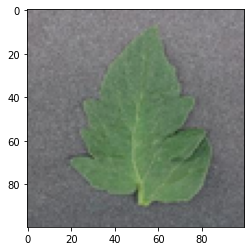

In [0]:
plt.imshow(x_train[20])

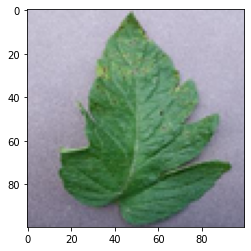

In [0]:
plt.imshow(x_test[20])

## Normalize the train and test data

In [0]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

## Build a Neural Network

In [0]:
# define plotting loss function

def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve one or more classification metrics vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()
  plt.show()

In [0]:
# define deep neural network model
def create_model(learning_rate):
  """Create and compile deep neural net model"""
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(tf.keras.layers.Flatten(input_shape=(100, 100, 3)))

  # Define the first hidden layer
  model.add(tf.keras.layers.Dense(units=270,
                                  activation='relu',
                                  kernel_regularizer=tf.keras.regularizers.l2(0.15),
                                  name='Hidden1'))
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.4))

  # Define the output layer
  model.add(tf.keras.layers.Dense(units=10,
                                  activation='softmax',
                                  name='Output'))
  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model

## Define training function

In [0]:
def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.05):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True,
                      validation_split=validation_split)
  
  # The list of epochs of the model
  epochs = history.epoch

  # gather a snapshot of the model's mean squared error
  # at each epoch.
  hist = pd.DataFrame(history.history)

  return epochs, hist

In [0]:
# define the hyperparameters
learning_rate = 0.00000009
epochs = 120
batch_size = 150
validation_split = 0.4


# Established model's topography
my_model = create_model(learning_rate)

# Train the model on normalized training set
epochs, hist = train_model(my_model, x_train_norm, y_train, epochs,
                          batch_size, validation_split)

# plot accuracy vs epochs of training
list_of_metrics_to_plot = ['accuracy'] 
plot_curve(epochs, hist, list_of_metrics_to_plot)

Epoch 1/120
74/74 [==============================] - 3s 39ms/step - loss: 82.9221 - accuracy: 0.0948 - val_loss: 82.6945 - val_accuracy: 0.0846
Epoch 2/120
74/74 [==============================] - 2s 22ms/step - loss: 82.7497 - accuracy: 0.0927 - val_loss: 82.5528 - val_accuracy: 0.0754
Epoch 3/120
74/74 [==============================] - 2s 22ms/step - loss: 82.6143 - accuracy: 0.0954 - val_loss: 82.4420 - val_accuracy: 0.0790
Epoch 4/120
74/74 [==============================] - 2s 22ms/step - loss: 82.5132 - accuracy: 0.0977 - val_loss: 82.3480 - val_accuracy: 0.0902
Epoch 5/120
74/74 [==============================] - 2s 22ms/step - loss: 82.4096 - accuracy: 0.1027 - val_loss: 82.2627 - val_accuracy: 0.1008
Epoch 6/120
74/74 [==============================] - 2s 22ms/step - loss: 82.3246 - accuracy: 0.1039 - val_loss: 82.1805 - val_accuracy: 0.1090
Epoch 7/120
74/74 [==============================] - 2s 22ms/step - loss: 82.2323 - accuracy: 0.1129 - val_loss: 82.0998 - val_accuracy:

In [0]:
my_model.evaluate(x=x_test_norm, y=y_test, batch_size=batch_size)

# Convolutional Neural Network model

In [0]:
# define Convolutional Neural Network model.
# we are implementing architecture inspired by Alexnet for our CNN model
def create_cnn_model(learning_rate):
  """Create and compile deep neural net model"""
  model = tf.keras.models.Sequential()

  # Add 1st Convolutional layer
  model.add(layers.Conv2D(filters=96, kernel_size=(11, 11), strides=(4,4), 
                          activation='relu', input_shape=(100, 100, 3), padding='valid'))
  
  # Max Pooling
  model.add(layers.MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))
  
  # Add 2nd Convolutional layer
  model.add(layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), 
                          activation='relu', padding='same'))
   # Max Pooling
  model.add(layers.MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))

  # Add 3rd Convolutional layer
  model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1,1), 
                          activation='relu', padding='same'))
  
  # Add 4th Convolutional layer
  model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1,1), 
                          activation='relu', padding='same'))
  
  # Add 5th Convolutional layer
  model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1,1), 
                          activation='relu', padding='same'))

  # Max pooling
  model.add(layers.MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))

  # passing to fully connected layer
  model.add(layers.Flatten())
  # Define the first fully connected layer
  model.add(layers.Dense(units=9216, activation='relu', name='fully1'))

  # Define a dropout regularization layer for first fully connected layer. 
  model.add(layers.Dropout(rate=0.5))

  # Define the second fully connected layer
  model.add(layers.Dense(units=4096, activation='relu', name='fully2'))

  # Define a dropout regularization layer for second fully connected layer. 
  model.add(layers.Dropout(rate=0.5))

  # Define third fully connected layer
  model.add(layers.Dense(units=1000, activation='relu', name='fully3'))

  # Define a dropout regularization layer for third fully connected layer. 
  model.add(layers.Dropout(rate=0.5))

  # Define the output layer
  model.add(layers.Dense(units=10,
                                  activation='softmax',
                                  name='Output'))
  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model

In [0]:
# Established model's topography
learning_rate = 0.0003
my_cnn_model = create_cnn_model(learning_rate)

## Define train function for cnn model

In [0]:
def train_cnn_model(model, train_features, train_label, epochs,
                batch_size, validation_split=0.05):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True,
                      validation_split=validation_split)
  
  # The list of epochs of the model
  epochs = history.epoch

  # gather a snapshot of the model's mean squared error
  # at each epoch.
  hist = pd.DataFrame(history.history)


## Train CNN model

In [0]:
# define the hyperparameters
epochs = 80
batch_size = 1000
validation_split = 0.4

# Train the model on normalized training set
epochs, hist = train_cnn_model(my_cnn_model, x_train_norm, y_train, epochs,
                          batch_size, validation_split)

# plot accuracy vs epochs of training
list_of_metrics_to_plot = ['accuracy'] 
plot_curve(epochs, hist, list_of_metrics_to_plot)

Epoch 1/80
12/12 [==============================] - 5s 389ms/step - loss: 2.2930 - accuracy: 0.1042 - val_loss: 2.2402 - val_accuracy: 0.1233
Epoch 2/80
12/12 [==============================] - 3s 244ms/step - loss: 2.2298 - accuracy: 0.1706 - val_loss: 2.0712 - val_accuracy: 0.1976
Epoch 3/80
12/12 [==============================] - 3s 244ms/step - loss: 2.2274 - accuracy: 0.1703 - val_loss: 2.2464 - val_accuracy: 0.1398
Epoch 4/80
12/12 [==============================] - 3s 244ms/step - loss: 2.1930 - accuracy: 0.1692 - val_loss: 2.1845 - val_accuracy: 0.1629
Epoch 5/80
12/12 [==============================] - 3s 244ms/step - loss: 2.0330 - accuracy: 0.1987 - val_loss: 1.9750 - val_accuracy: 0.2195
Epoch 6/80
12/12 [==============================] - 3s 242ms/step - loss: 1.9269 - accuracy: 0.2378 - val_loss: 2.4286 - val_accuracy: 0.1697
Epoch 7/80
12/12 [==============================] - 3s 244ms/step - loss: 2.0718 - accuracy: 0.2229 - val_loss: 1.9591 - val_accuracy: 0.2661
Epoch 

TypeError: ignored

In [0]:
my_cnn_model.evaluate(x=x_test_norm, y=y_test, batch_size=batch_size)